In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

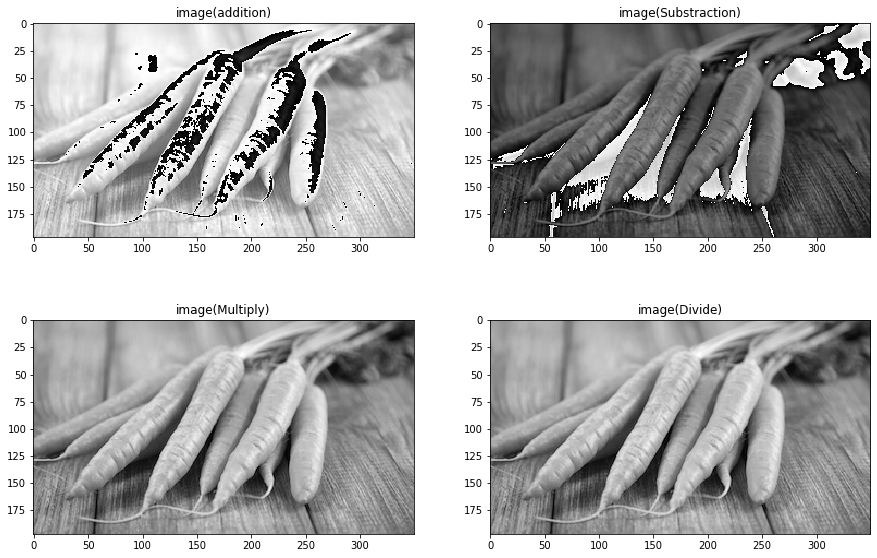

In [15]:
img_original = cv2.imread("carrot.bmp")
img_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)

add_num, sub_num, mul_num, div_num = 70, 70, 1.5, 1.5
# 사용할 변수를 저장

add_img = img_gray + add_num
sub_img = img_gray - sub_num
mul_img = img_gray * mul_num
div_img = img_gray / div_num
# 산술 cv2함수를 이용하지 않고 계산
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title("image(addition)")
plt.imshow(add_img, cmap = 'gray')

plt.subplot(222)
plt.title("image(Substraction)")
plt.imshow(sub_img, cmap = 'gray')

plt.subplot(223)
plt.title("image(Multiply)")
plt.imshow(mul_img, cmap = 'gray')

plt.subplot(224)
plt.title("image(Divide)")
plt.imshow(div_img, cmap = 'gray')

# 영상 클램핑 처리를 해주지 않아 픽샐의 값이 너무 크거나 작은 형태로 표현되기도 한다.

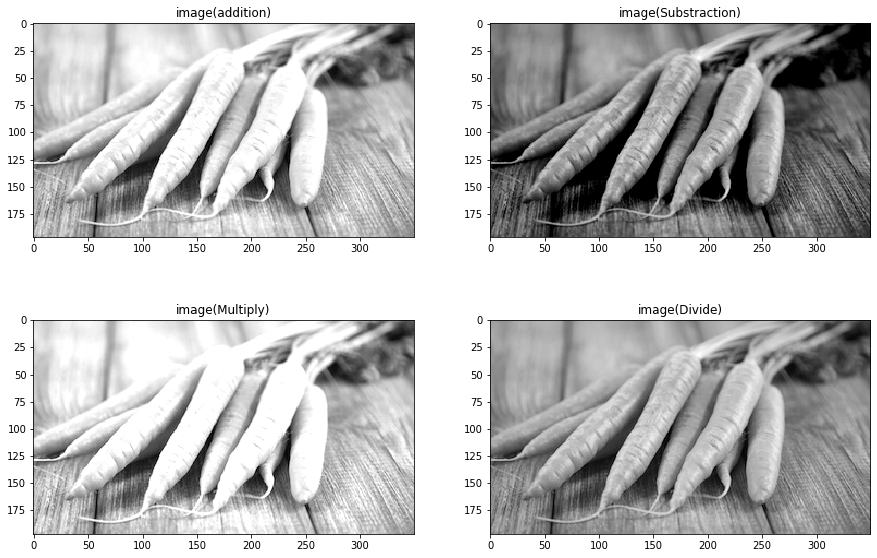

In [16]:
add_img = cv2.add(img_gray, add_num)
sub_img = cv2.subtract(img_gray, sub_num)
mul_img = cv2.multiply(img_gray, mul_num)
div_img = cv2.divide(img_gray, div_num)
#  앞서 선언안 변수를 이용하여 계산
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title("image(addition)")
plt.imshow(add_img, cmap = 'gray')

plt.subplot(222)
plt.title("image(Substraction)")
plt.imshow(sub_img, cmap = 'gray')

plt.subplot(223)
plt.title("image(Multiply)")
plt.imshow(mul_img, cmap = 'gray')

plt.subplot(224)
plt.title("image(Divide)")
plt.imshow(div_img, cmap = 'gray')

# 픽셀당 값의 범위를 저장해주어 값이 너무 크거나 작지 않게 해줌

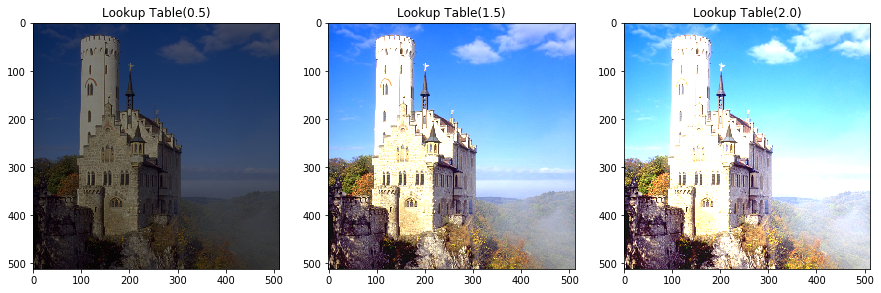

In [32]:
img_original = cv2.imread('Lichtenstein.bmp')
table = np.zeros((256, 3), dtype = np.uint8) # 테이블 선언
value = np.array([0.5, 1.5, 2.0]) # value값으로 사용할 변수를 선언

for i in range(256):
    temp = i * value
    temp = np.array([255 if val > 255 else val for val in temp], dtype = np.uint8)
    table[i] = temp
# Lookup table을 저장

lukup_0_dot_5 = cv2.LUT(img_original[:,:,::-1], table[:, 0]) 
lukup_1_dot_5 = cv2.LUT(img_original[:,:,::-1], table[:, 1])
lukup_2_dot_0 = cv2.LUT(img_original[:,:,::-1], table[:, 2])
# array indexing을 통하여 Lookup table을 적용한다.
plt.figure(figsize = (15,45))

plt.subplot(1,3,1)
plt.title("Lookup Table(0.5)")
plt.imshow(lukup_0_dot_5)

plt.subplot(1,3,2)
plt.title("Lookup Table(1.5)")
plt.imshow(lukup_1_dot_5)

plt.subplot(1,3,3)
plt.title("Lookup Table(2.0)")
plt.imshow(lukup_2_dot_0)

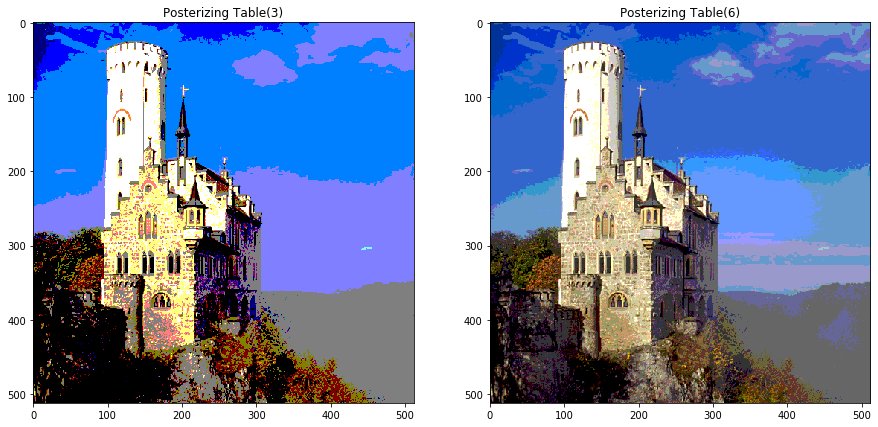

In [41]:
table = np.zeros((256, 2), dtype = np.uint8)
step = 256 / np.array([3,6])
inc = 255/ (np.array([3,6]) - 1)
# step과 inc를 선언함.
for i in range(256):
    temp = i/step # i/step연산을 먼저해줌
    temp = temp.astype(np.uint8) * inc # temp를 정수형으로 형변환을 후 inc변수를 곱해줌
    table[i] = temp
    
gamma_3 = cv2.LUT(img_original[:,:,::-1], table[:, 0])
gamma_6 = cv2.LUT(img_original[:,:,::-1], table[:, 1])
# 위와 마찬가지로 Lookup table을 사용해 변환함
plt.figure(figsize = (15,30))

plt.subplot(1,2,1)
plt.title("Posterizing Table(3)")
plt.imshow(gamma_3)


plt.subplot(1,2,2)
plt.title("Posterizing Table(6)")
plt.imshow(gamma_6)

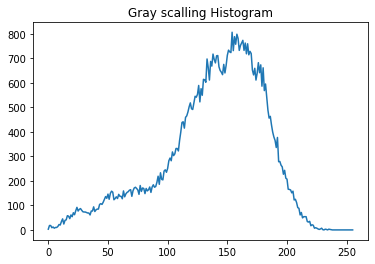

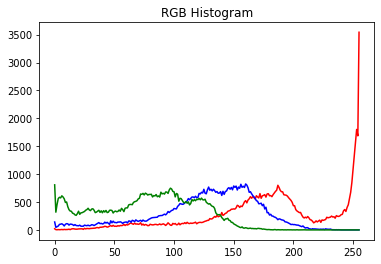

In [50]:
img_original = cv2.imread("carrot.bmp")
img_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
img_rgb = img_original[:, :, ::-1]

gray_hist = cv2.calcHist([img_gray], [0], None, [256], [0,256])

plt.title("Gray scalling Histogram")
plt.plot(gray_hist)
plt.show()

rgb = cv2.split(img_rgb)
colors = ['red', 'blue', 'green']

plt.title("RGB Histogram")
for channel, colors in zip(rgb, colors):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(hist, color = colors)


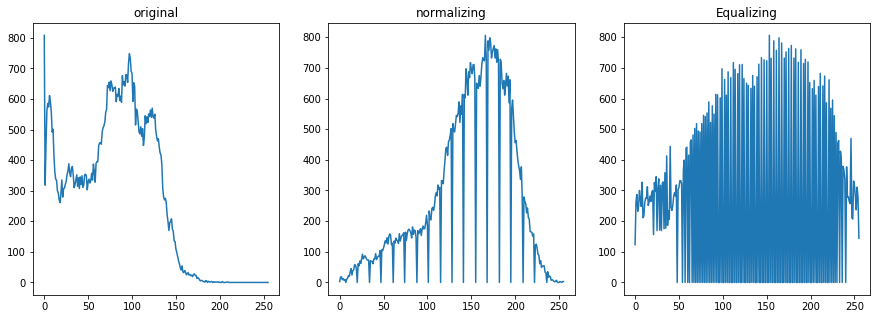

In [62]:
img_original = cv2.imread("carrot.bmp")
img_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
# 이미지를 읽어온후 Gray Scailing을 함

img_normalizing = cv2.normalize(img_gray, None, 0, 256, cv2.NORM_MINMAX)
# 이미지를 노멀라이징
img_equalizing = cv2.equalizeHist(img_gray)
# 이미지를 평탄화함
titles = ['original', 'normalizing', 'Equalizing']
plt.figure(figsize = (15,5))
for title, idx, plot in zip(titles, range(1,4), [img_original, img_normalizing, img_equalizing]):
    h = cv2.calcHist([plot], [0], None, [256], [0,256]) # 이미지를 히스토그램으로 저장
    plt.subplot(1,3,idx)
    plt.title(title)
    plt.plot(h)